In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.listdir('.')
# os.chdir("drive/My Drive/Colab_Test/Dataset/Regression")

['winequality-white.csv', 'housing.csv', 'auto.csv']

In [ ]:
df = pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Data Cleansing**

In [ ]:
missing_values = ['?']

dataset = pd.read_csv('auto.csv', na_values=missing_values)

In [ ]:
dataset.isna().sum() #untuk melihat data yg kosong

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
 engine-size          0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
dataset['normalized-losses'] = dataset['normalized-losses'].interpolate(method='linear', limit_direction = 'both')
dataset['bore'] = dataset['bore'].interpolate(method='linear', limit_direction = 'both')
dataset['stroke'] = dataset['stroke'].interpolate(method = 'linear', limit_direction ='both')
dataset['horsepower'] = dataset['horsepower'].interpolate(method = 'linear', limit_direction='both')
dataset['peak-rpm'] = dataset['peak-rpm'].interpolate(method='linear', limit_direction='both')
dataset['price'] = dataset['price'].interpolate(method = 'linear', limit_direction = 'both')


In [ ]:
dataset['num-of-doors'].isna().sum() #kita cari karena mobil harus 2 atau 4 pintunya

2

In [ ]:
dataset[['make', 'body-style']][dataset['num-of-doors'].isnull()==True]

,make,body-style
27,dodge,sedan
63,mazda,sedan


In [ ]:
dataset['num-of-doors'] = dataset['num-of-doors'].fillna('four')

In [ ]:
dataset.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
dataset['make'] = dataset['make'].astype(str)

**EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99366c8630>,
      dtype=object)

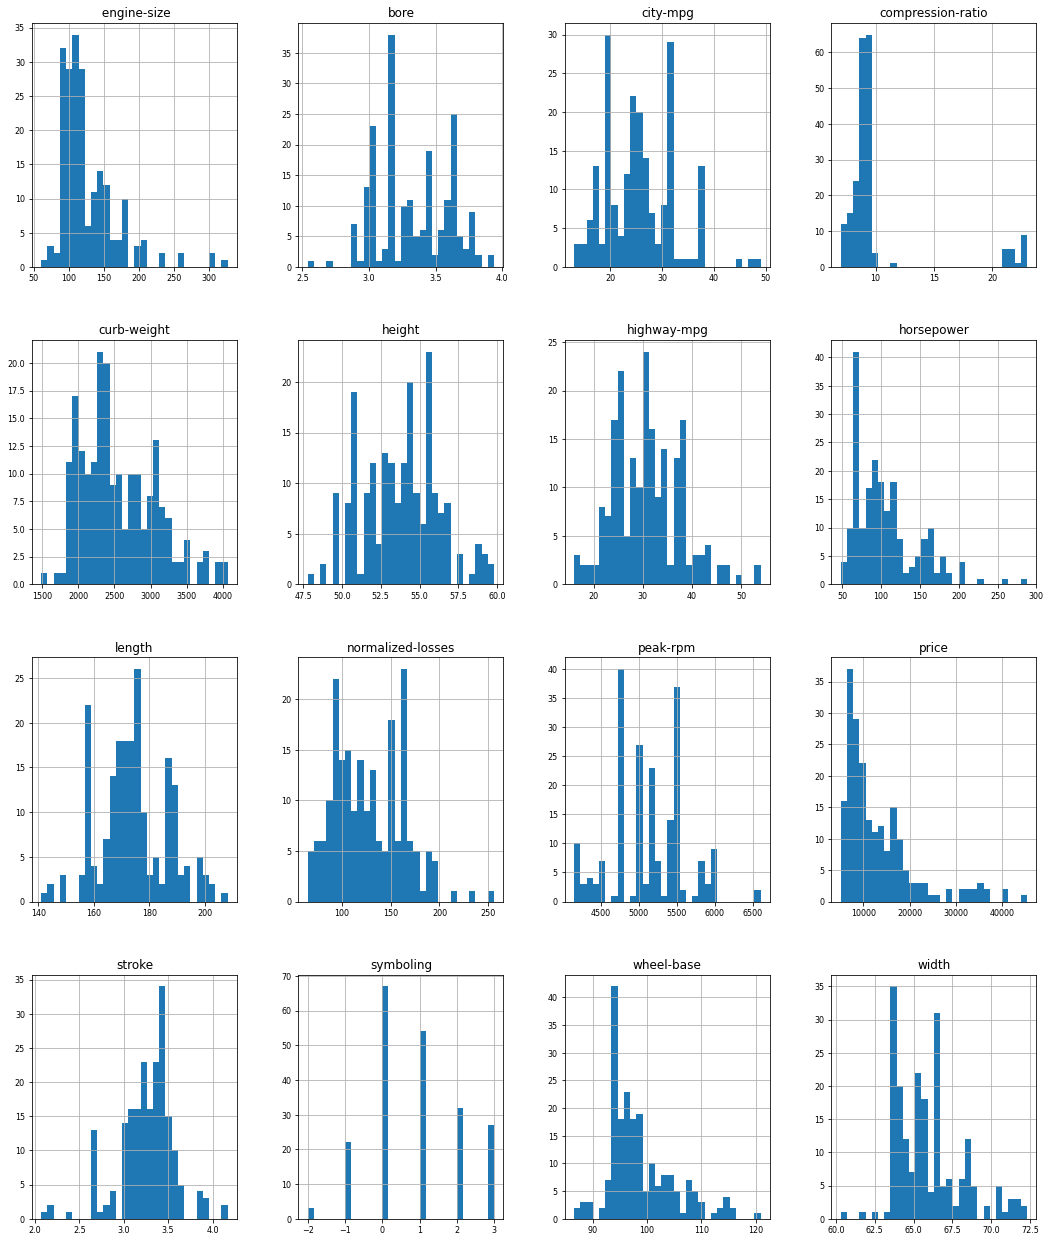

In [ ]:
dataset.hist(figsize=(18,22), bins = 30, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.corr()['price'][:-1]

symboling           -0.082593
normalized-losses    0.271576
wheel-base           0.582865
length               0.688120
width                0.751468
height               0.126004
curb-weight          0.835369
 engine-size         0.871891
bore                 0.545356
stroke               0.083788
compression-ratio    0.067582
horsepower           0.757717
peak-rpm            -0.095059
city-mpg            -0.686775
highway-mpg         -0.702886
Name: price, dtype: float64

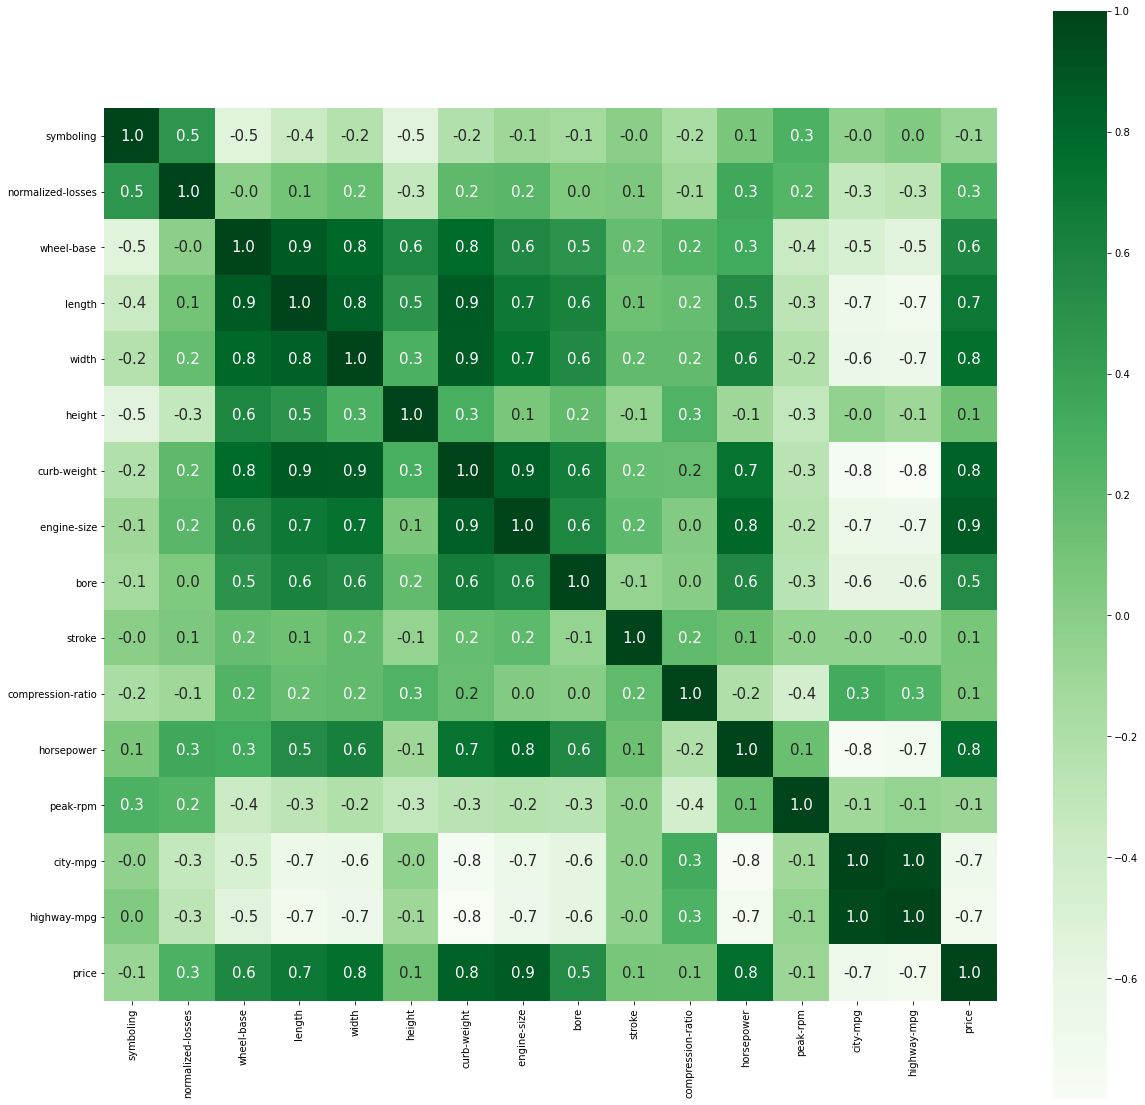

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 15}, cmap = 'Greens')

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

**Converting**

In [ ]:
# Convert make
dataset['make'][dataset['make']=='alfa-romero'] = 0
dataset['make'][dataset['make']=='audi'] = 1
dataset['make'][dataset['make']=='bmw'] = 2
dataset['make'][dataset['make']=='chevrolet'] = 3
dataset['make'][dataset['make']=='dodge'] = 4
dataset['make'][dataset['make']=='honda'] = 5
dataset['make'][dataset['make']=='isuzu'] = 6
dataset['make'][dataset['make']=='jaguar'] = 7
dataset['make'][dataset['make']=='mazda'] = 8
dataset['make'][dataset['make']=='mercedes-benz'] = 9
dataset['make'][dataset['make']=='mercury'] = 10
dataset['make'][dataset['make']=='mitsubishi'] = 11
dataset['make'][dataset['make']=='nissan'] = 12
dataset['make'][dataset['make']=='peugot'] = 13
dataset['make'][dataset['make']=='plymouth'] = 14
dataset['make'][dataset['make']=='porsche'] = 15
dataset['make'][dataset['make']=='renault'] = 16
dataset['make'][dataset['make']=='saab'] = 17
dataset['make'][dataset['make']=='subaru'] = 18
dataset['make'][dataset['make']=='toyota'] = 19
dataset['make'][dataset['make']=='volkswagen'] = 20
dataset['make'][dataset['make']=='volvo'] = 21
dataset['make'] = dataset['make'].astype('int')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
# Convert fuel-type 
dataset['fuel-type'][dataset['fuel-type'] == 'gas'] = 1
dataset['fuel-type'][dataset['fuel-type'] == 'diesel'] = 2
dataset['fuel-type'] = dataset['fuel-type'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Convert aspiration
dataset['aspiration'][dataset['aspiration'] == 'std'] = 0
dataset['aspiration'][dataset['aspiration'] == 'turbo'] = 1 
dataset['aspiration'] = dataset['aspiration'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataset['num-of-doors'][dataset['num-of-doors'] == 'two'] = 0  
dataset['num-of-doors'][dataset['num-of-doors'] == 'four'] = 1
dataset['num-of-doors'] = dataset['num-of-doors'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset['body-style'][dataset['body-style'] == 'convertible'] = 0
dataset['body-style'][dataset['body-style'] == 'hatchback'] = 1
dataset['body-style'][dataset['body-style'] == 'sedan'] = 2
dataset['body-style'][dataset['body-style'] == 'wagon'] = 3
dataset['body-style'][dataset['body-style'] == 'hardtop'] = 4
dataset['body-style'] = dataset['body-style'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
dataset['drive-wheels'][dataset['drive-wheels'] == 'rwd'] = 0  
dataset['drive-wheels'][dataset['drive-wheels'] == 'fwd'] = 1  
dataset['drive-wheels'][dataset['drive-wheels'] == '4wd'] = 2
dataset['drive-wheels'] = dataset['drive-wheels'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
dataset['engine-location'][dataset['engine-location'] == 'front'] = 0
dataset['engine-location'][dataset['engine-location'] == 'rear'] = 1
dataset['engine-location'] = dataset['engine-location'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset['engine-type'][dataset['engine-type'] == 'dohc'] = 0
dataset['engine-type'][dataset['engine-type'] == 'ohcv'] = 1
dataset['engine-type'][dataset['engine-type'] == 'ohc'] = 2
dataset['engine-type'][dataset['engine-type'] == 'l'] = 3
dataset['engine-type'][dataset['engine-type'] == 'ohcf'] = 4
dataset['engine-type'][dataset['engine-type'] == 'rotor'] = 5
dataset['engine-type'][dataset['engine-type'] == 'dohcv'] = 6
dataset['engine-type'] = dataset['engine-type'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'four'] = 0
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'six'] = 1  
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'five'] = 2 
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'three'] = 3 
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'twelve'] = 4 
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'two'] = 5 
dataset['num-of-cylinders'][dataset['num-of-cylinders'] == 'eight'] = 6 
dataset['num-of-cylinders'] = dataset['num-of-cylinders'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
dataset['fuel-system'][dataset['fuel-system'] == 'mpfi'] = 0
dataset['fuel-system'][dataset['fuel-system'] == '2bbl'] = 1
dataset['fuel-system'][dataset['fuel-system'] == '1bbl'] = 2
dataset['fuel-system'][dataset['fuel-system'] == 'mfi'] = 3
dataset['fuel-system'][dataset['fuel-system'] == 'spfi'] = 4
dataset['fuel-system'][dataset['fuel-system'] == '4bbl'] = 5
dataset['fuel-system'][dataset['fuel-system'] == 'idi'] = 6
dataset['fuel-system'][dataset['fuel-system'] == 'spdi'] = 7
dataset['fuel-system'] = dataset['fuel-system'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
# Transofrmation
num_var = ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',  'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', ' engine-size','fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
dataset[num_var] = np.log1p(dataset[num_var])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    float64
 4   aspiration         205 non-null    float64
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    float64
 7   drive-wheels       205 non-null    float64
 8   engine-location    205 non-null    float64
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    float64
 15  num-of-cylinders   205 non-null    float64
 16   engine-size       205 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9933beb588>,
      dtype=object)

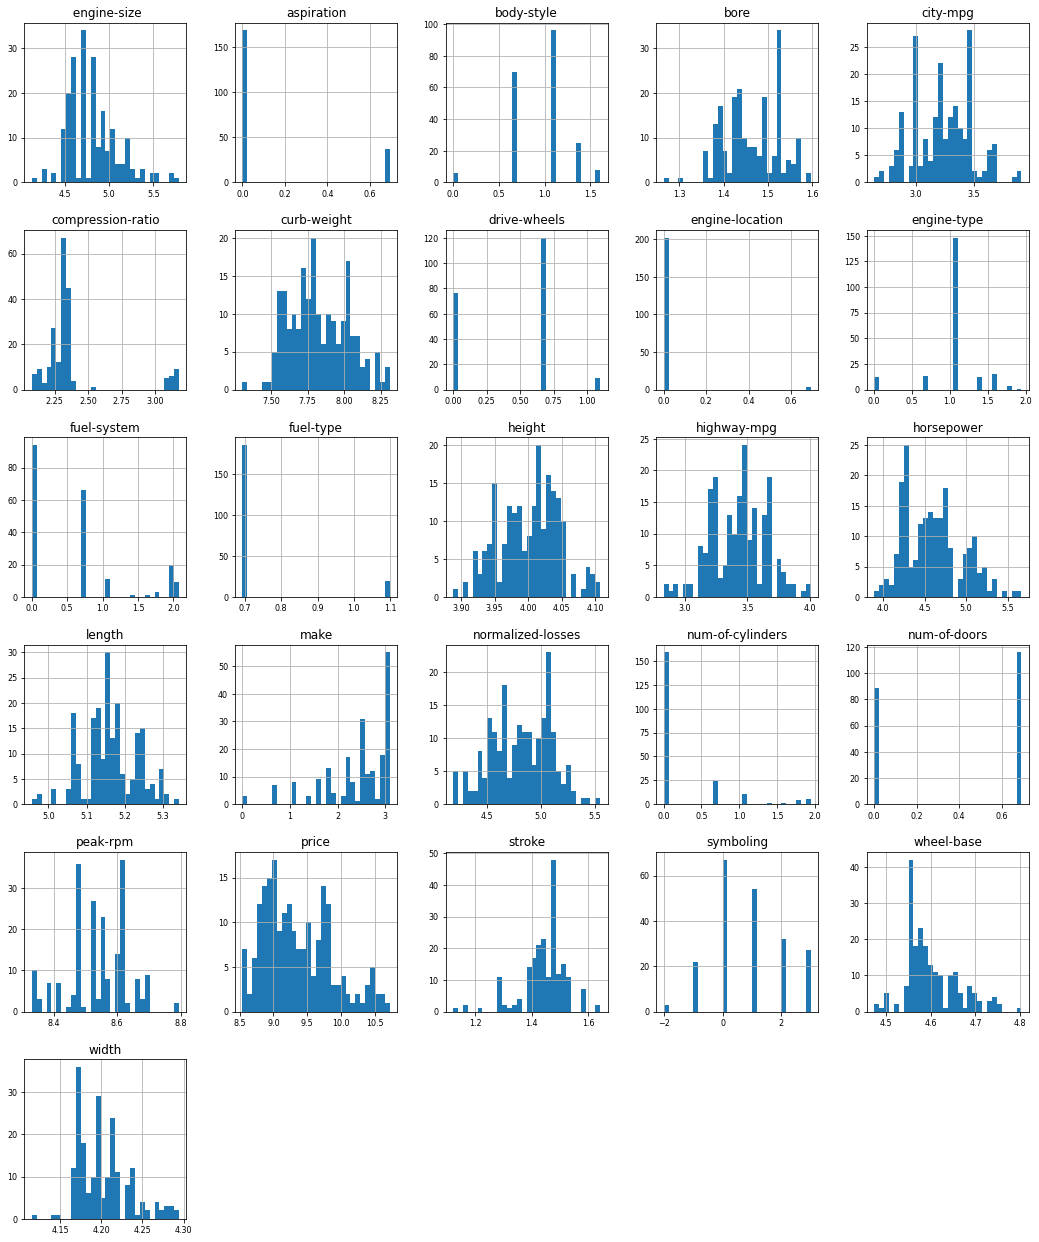

In [ ]:
dataset.hist(figsize=(18,22), bins = 30, xlabelsize=8, ylabelsize=8)

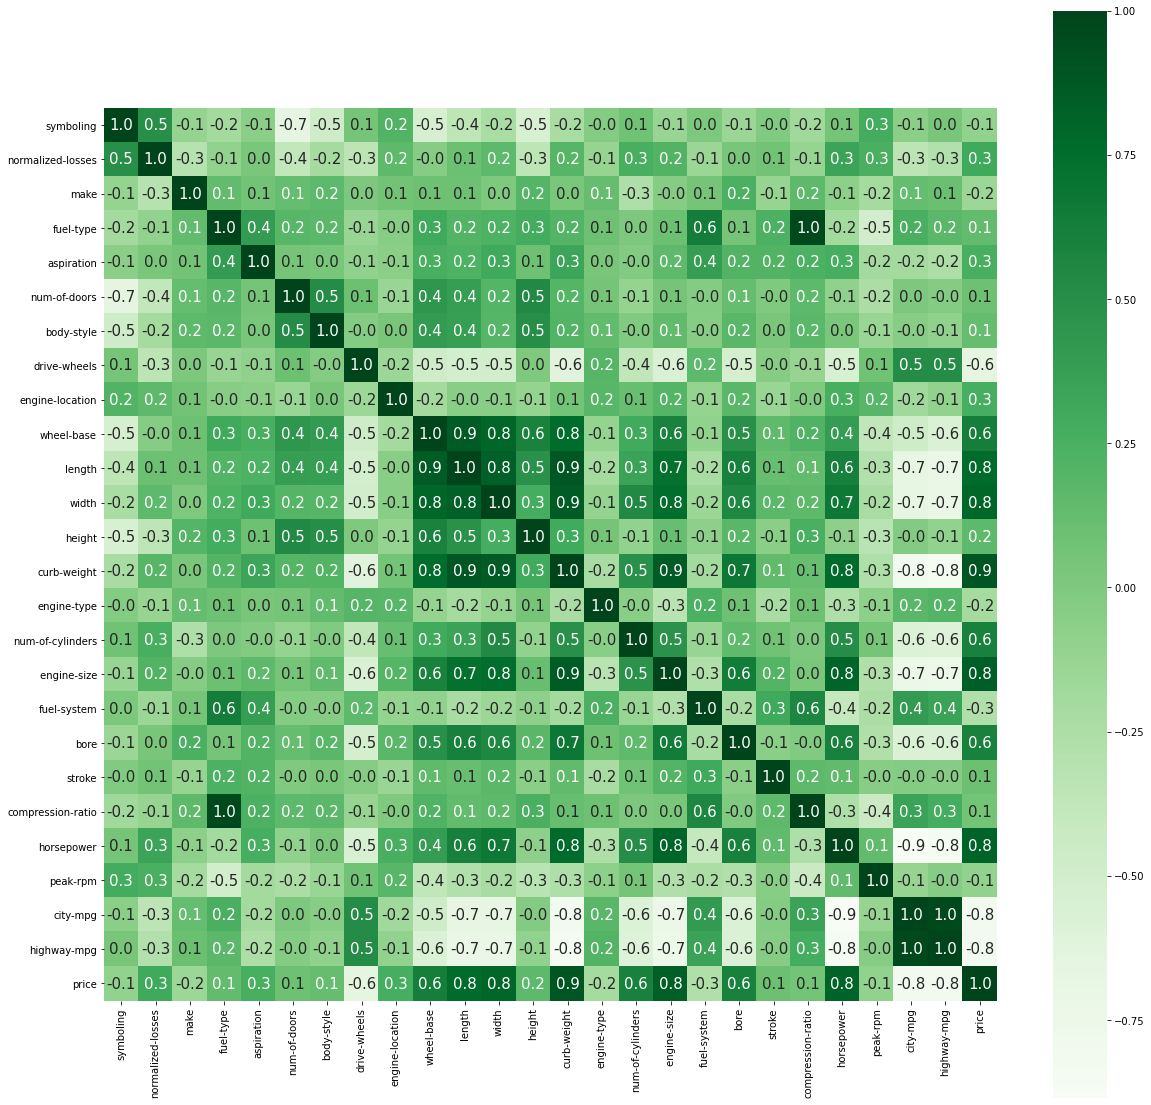

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 15}, cmap = 'Greens')

**1. Transform Preprocessing**

In [ ]:
label = dataset['price']
features = dataset.drop(['price'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, RobustScaler, MaxAbsScaler
pre_proc = [StandardScaler(), PowerTransformer(method='yeo-johnson', standardize = True), QuantileTransformer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

for proc in pre_proc : 
  scaler = proc
  feature_scaled = scaler.fit_transform(features.values)
  label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

  from sklearn.model_selection import train_test_split
  feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

  linear_reg = LinearRegression()

  linear_reg.fit(feature_train, label_train)
  predictions = linear_reg.predict(feature_test)
  
  mse = round(mean_squared_error(label_test, predictions),10)
  mae = round(mean_absolute_error(label_test, predictions),10)
  r2 = round(r2_score(label_test, predictions),10)
  rmse = round(np.sqrt(mean_squared_error(label_test, predictions)),10)

  text = str(proc)
  text1 = text.split('(')[0]


  print(f"Preprocessing dengan model      -> {text1}")
  print(f"MSE (Mean Squared Error)        : {mse}")
  print(f"MAE (Mean Absolute Error)       : {mae}")
  print(f"r^2 score                       : {r2}")
  print(f'RMSE (Root Mean Squared Error)  : {rmse}\n')

Preprocessing dengan model      -> StandardScaler
MSE (Mean Squared Error)        : 0.1380537774
MAE (Mean Absolute Error)       : 0.2734278982
r^2 score                       : 0.8394523115
RMSE (Root Mean Squared Error)  : 0.3715558873

Preprocessing dengan model      -> PowerTransformer
MSE (Mean Squared Error)        : 0.1055552984
MAE (Mean Absolute Error)       : 0.2621849101
r^2 score                       : 0.8711656544
RMSE (Root Mean Squared Error)  : 0.324892749

Preprocessing dengan model      -> QuantileTransformer
MSE (Mean Squared Error)        : 0.0092113752
MAE (Mean Absolute Error)       : 0.078889418
r^2 score                       : 0.8656695858
RMSE (Root Mean Squared Error)  : 0.0959759092

Preprocessing dengan model      -> MinMaxScaler
MSE (Mean Squared Error)        : 0.0072650775
MAE (Mean Absolute Error)       : 0.0627247305
r^2 score                       : 0.8394523115
RMSE (Root Mean Squared Error)  : 0.0852354242

Preprocessing dengan model      -> MaxAbs

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (205). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (205). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


**Untuk Metode Box-Cox, tidak digunakan karena Box-Cox hanya akan menjalankan apabila dataset tidak ada angka 0. Jadi apabila di jalankan pada case ini, Box-Cox akan error**

**Pada case ini, PowerTransformer merupakan scaler yang terbaik dengan r2 1,0**

**2. Masukan kedalam Algoritma**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.PowerTransformer(method='yeo-johnson')

features_scaled = scaler.fit_transform(features.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.25, random_state=10)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
for i in range(10, 501, 20) :
  print("Random Forest Regressor, dengan n_estimators = ",i)
  forest_reg = RandomForestRegressor(n_estimators=i, random_state=10, max_features='log2')
  forest_reg.fit(feature_train, label_train)
  predictions = forest_reg.predict(feature_test)
  print(f"r^2 score Random Forest Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) Random Forest Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

Random Forest Regressor, dengan n_estimators =  10
r^2 score Random Forest Regressor                       : 0.9128233743398281
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.2672540026734019

Random Forest Regressor, dengan n_estimators =  30
r^2 score Random Forest Regressor                       : 0.9140825978682641
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.26531680537761376

Random Forest Regressor, dengan n_estimators =  50
r^2 score Random Forest Regressor                       : 0.9145847226943564
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.2645403772675429

Random Forest Regressor, dengan n_estimators =  70
r^2 score Random Forest Regressor                       : 0.9166964141184988
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.2612498436380325

Random Forest Regressor, dengan n_estimators =  90
r^2 score Random Forest Regressor                       : 0.9181163986656662
RMSE (Root Mean Squared Error) Random Forest Re

In [ ]:
for i in range(1, 501, 5) :
  print("XGBRegressor, dengan n_estimators = ",i)
  xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=i)
  xg_reg.fit(feature_train, label_train)
  predictions = xg_reg.predict(feature_test)
  print(f"r^2 score XGBRegressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) XGBRegressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

XGBRegressor, dengan n_estimators =  1
[17:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.06476428352734054
RMSE (Root Mean Squared Error) XGBRegressor  : 0.8753560405583557

XGBRegressor, dengan n_estimators =  6
[17:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.6148135854369158
RMSE (Root Mean Squared Error) XGBRegressor  : 0.5617714598576482

XGBRegressor, dengan n_estimators =  11
[17:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.8011412001798172
RMSE (Root Mean Squared Error) XGBRegressor  : 0.4036422310305281

XGBRegressor, dengan n_estimators =  16
[17:03:02] WARNING: /workspace/src/objective/regression_obj.c

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel :
  print("SVR, dengan n_estimators = ",i)
  svr_reg = SVR(kernel = i,C=1.0, epsilon=0.2)
  svr_reg.fit(feature_train, label_train)
  predictions = svr_reg.predict(feature_test)
  print(f"r^2 score SVR                      : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) SVR : {np.sqrt(mean_squared_error(label_test, predictions))}\n')


SVR, dengan n_estimators =  linear
r^2 score SVR                      : 0.8774326884933278
RMSE (Root Mean Squared Error) SVR : 0.3168921791397033

SVR, dengan n_estimators =  poly
r^2 score SVR                      : 0.7283633278742545
RMSE (Root Mean Squared Error) SVR : 0.471757041891144

SVR, dengan n_estimators =  rbf
r^2 score SVR                      : 0.8728555548769737
RMSE (Root Mean Squared Error) SVR : 0.3227549312309807

SVR, dengan n_estimators =  sigmoid
r^2 score SVR                      : -1.2439374089140363
RMSE (Root Mean Squared Error) SVR : 1.3559059308287997



In [ ]:
for i in range(1, 301, 5) :
  print("KNN Regressor, dengan n_neighbors = ",i)
  knn_reg = KNeighborsRegressor(n_neighbors=1)
  knn_reg.fit(feature_train, label_train)
  predictions = knn_reg.predict(feature_test)
  print(f"r^2 score KNN Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) KNN Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')



KNN Regressor, dengan n_neighbors =  1
r^2 score KNN Regressor                       : 0.8701545825656132
RMSE (Root Mean Squared Error) KNN Regressor  : 0.3261651114114024

KNN Regressor, dengan n_neighbors =  6
r^2 score KNN Regressor                       : 0.8701545825656132
RMSE (Root Mean Squared Error) KNN Regressor  : 0.3261651114114024

KNN Regressor, dengan n_neighbors =  11
r^2 score KNN Regressor                       : 0.8701545825656132
RMSE (Root Mean Squared Error) KNN Regressor  : 0.3261651114114024

KNN Regressor, dengan n_neighbors =  16
r^2 score KNN Regressor                       : 0.8701545825656132
RMSE (Root Mean Squared Error) KNN Regressor  : 0.3261651114114024

KNN Regressor, dengan n_neighbors =  21
r^2 score KNN Regressor                       : 0.8701545825656132
RMSE (Root Mean Squared Error) KNN Regressor  : 0.3261651114114024

KNN Regressor, dengan n_neighbors =  26
r^2 score KNN Regressor                       : 0.8701545825656132
RMSE (Root Mean Squa

**Dari pengujian diatas didapatkan r2 terbesar adalah 0.9195 dan rmse terbesar adalah 0.2567.
Angka diatas didapatkan dari Random Forest Regressor dengan n_estimators 150.** 